In [8]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Input,Convolution2D,MaxPool2D,Flatten,Dense,Dropout
from keras.utils import np_utils
import tensorflow
import matplotlib.pyplot as plt

In [12]:
x=pd.read_csv("E:/fashion-mnist_test.csv")
X_ = np.array(x)
X=X_[:,1:]
X=X/255.0
y=X_[:,0]
print(X.shape,y.shape)

(10000, 784) (10000,)


In [13]:
X_train = X.reshape((-1,28,28,1))
Y_train = np_utils.to_categorical(y)
print(X_train.shape,Y_train.shape)

(10000, 28, 28, 1) (10000, 10)


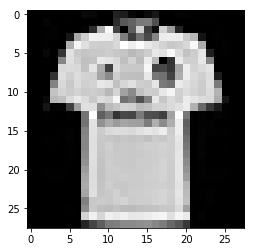

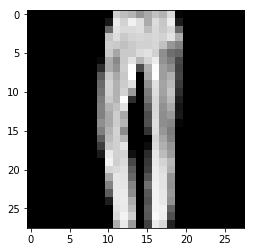

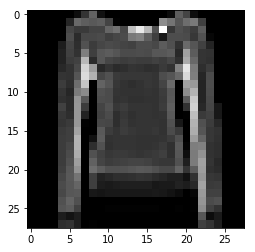

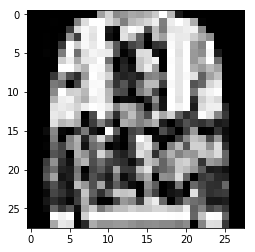

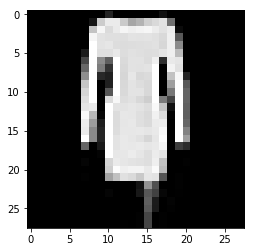

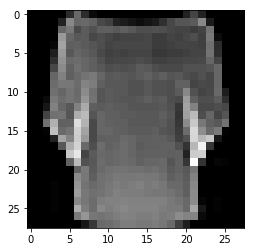

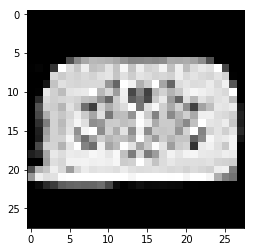

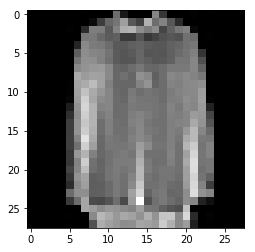

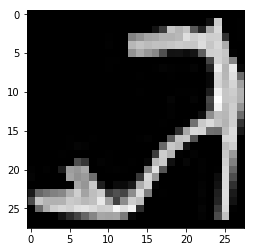

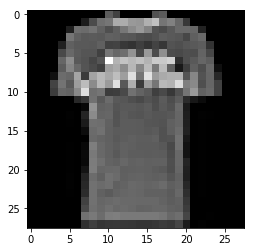

In [14]:
for i in range(10):
    plt.figure(i)
    plt.imshow(X_train[i].reshape(28,28),cmap="gray")
    plt.show()

## CNN MODEL

In [25]:
Convolution2D?

In [17]:
model = Sequential()
model.add(Convolution2D(32,(3,3),activation='relu',input_shape=(28,28,1))) #filters,strides,activation function,input size
model.add(Convolution2D(64,(3,3),activation='relu'))
model.add(Dropout(0.25))
model.add(MaxPool2D(2,2))
model.add(Convolution2D(32,(5,5),activation='relu'))
model.add(Convolution2D(8,(5,5),activation='relu'))
model.add(Flatten())
model.add(Dense(10,activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
dropout_2 (Dropout)          (None, 24, 24, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 8, 8, 32)          51232     
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 4, 4, 8)           6408      
_________________________________________________________________
flatten_1 (Flatten)          (None, 128)               0         
__________

In [18]:
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])


In [19]:
hist = model.fit(X_train,Y_train,epochs=20,shuffle=True,batch_size=256,validation_split=0.20)

Instructions for updating:
Use tf.cast instead.
Train on 8000 samples, validate on 2000 samples
Epoch 1/20
8000/8000 [==============================] - 67s 8ms/step - loss: 1.6786 - acc: 0.3766 - val_loss: 1.0500 - val_acc: 0.6375
Epoch 2/20
8000/8000 [==============================] - 65s 8ms/step - loss: 0.8512 - acc: 0.6879 - val_loss: 0.8138 - val_acc: 0.7225
Epoch 3/20
8000/8000 [==============================] - 66s 8ms/step - loss: 0.7082 - acc: 0.7380 - val_loss: 0.7180 - val_acc: 0.7320
Epoch 4/20
8000/8000 [==============================] - 66s 8ms/step - loss: 0.6204 - acc: 0.7704 - val_loss: 0.6480 - val_acc: 0.7470
Epoch 5/20
8000/8000 [==============================] - 68s 8ms/step - loss: 0.5806 - acc: 0.7854 - val_loss: 0.5685 - val_acc: 0.7975
Epoch 6/20
8000/8000 [==============================] - 66s 8ms/step - loss: 0.5270 - acc: 0.8073 - val_loss: 0.5324 - val_acc: 0.8155
Epoch 7/20
8000/8000 [==============================] - 67s 8ms/step - loss: 0.4985 - acc: 0.8

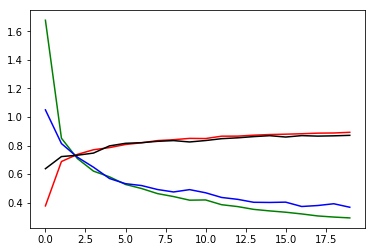

In [20]:
plt.figure(0)
plt.plot(hist.history['loss'],'g')
plt.plot(hist.history['val_loss'],'b')
plt.plot(hist.history['acc'],'r')
plt.plot(hist.history['val_acc'],'black')
plt.show()


In [21]:
hist = model.fit(X_train,Y_train,epochs=10,shuffle=True,batch_size=256,validation_split=0.20)

Train on 8000 samples, validate on 2000 samples
Epoch 1/10
8000/8000 [==============================] - 49s 6ms/step - loss: 0.2852 - acc: 0.8948 - val_loss: 0.3634 - val_acc: 0.8715
Epoch 2/10
8000/8000 [==============================] - 49s 6ms/step - loss: 0.2771 - acc: 0.8985 - val_loss: 0.3765 - val_acc: 0.8735
Epoch 3/10
8000/8000 [==============================] - 49s 6ms/step - loss: 0.2689 - acc: 0.9041 - val_loss: 0.3596 - val_acc: 0.8765
Epoch 4/10
8000/8000 [==============================] - 49s 6ms/step - loss: 0.2533 - acc: 0.9040 - val_loss: 0.3641 - val_acc: 0.8695
Epoch 5/10
8000/8000 [==============================] - 48s 6ms/step - loss: 0.2523 - acc: 0.9055 - val_loss: 0.3544 - val_acc: 0.8785
Epoch 6/10
8000/8000 [==============================] - 48s 6ms/step - loss: 0.2486 - acc: 0.9069 - val_loss: 0.3722 - val_acc: 0.8690
Epoch 7/10
8000/8000 [==============================] - 48s 6ms/step - loss: 0.2475 - acc: 0.9066 - val_loss: 0.3650 - val_acc: 0.8805
Epoch 8

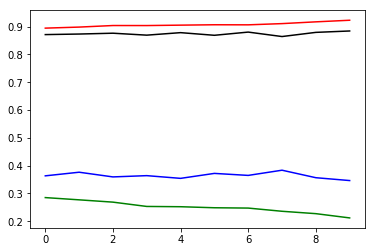

In [22]:
plt.figure(0)
plt.plot(hist.history['loss'],'g')
plt.plot(hist.history['val_loss'],'b')
plt.plot(hist.history['acc'],'r')
plt.plot(hist.history['val_acc'],'black')
plt.show()
